# __NLP Pipeline__
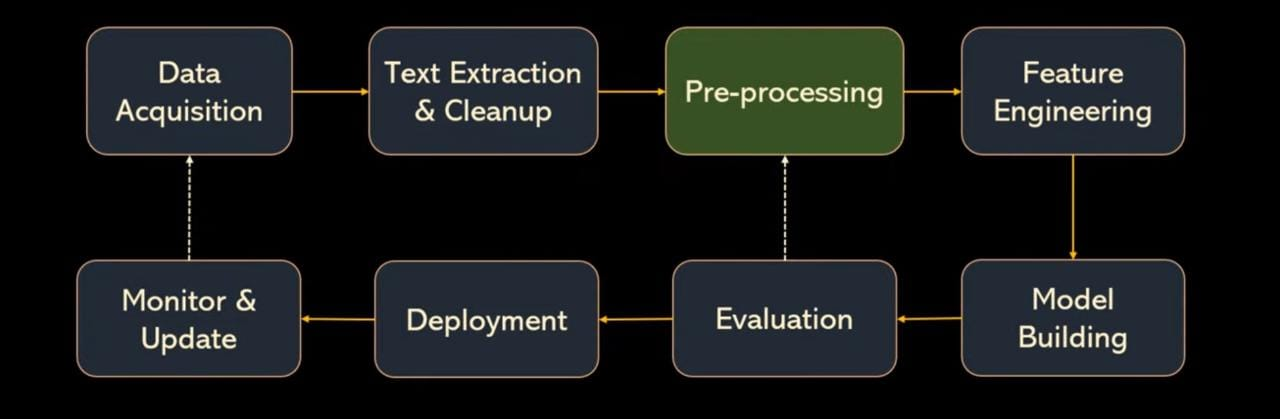

# __Preprocessing__
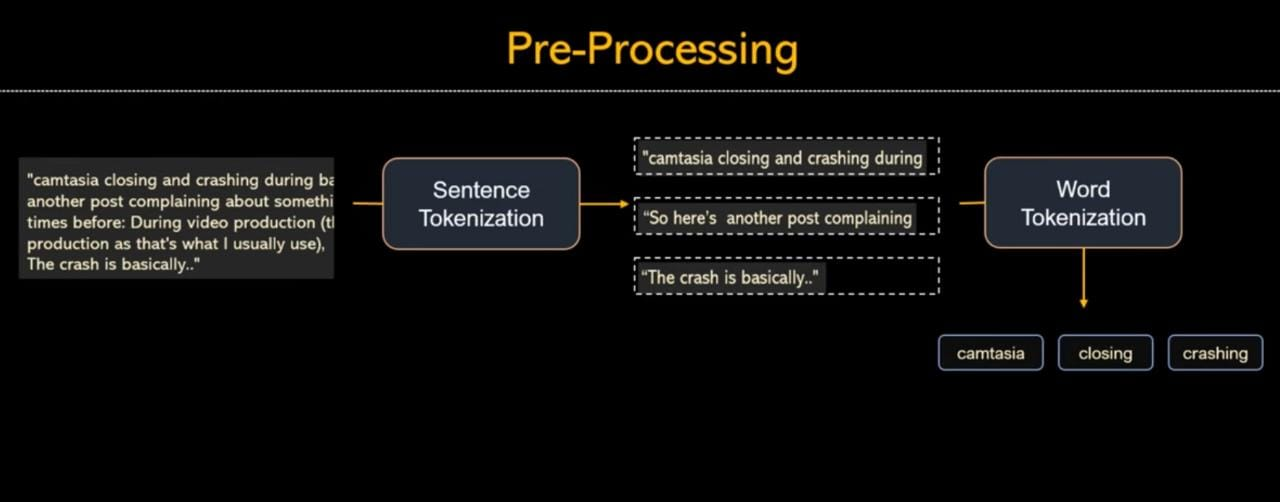

## __Tokenization__ is a process of splitting text into meaningful segments. Either from paragraph to sentences or sentence to words.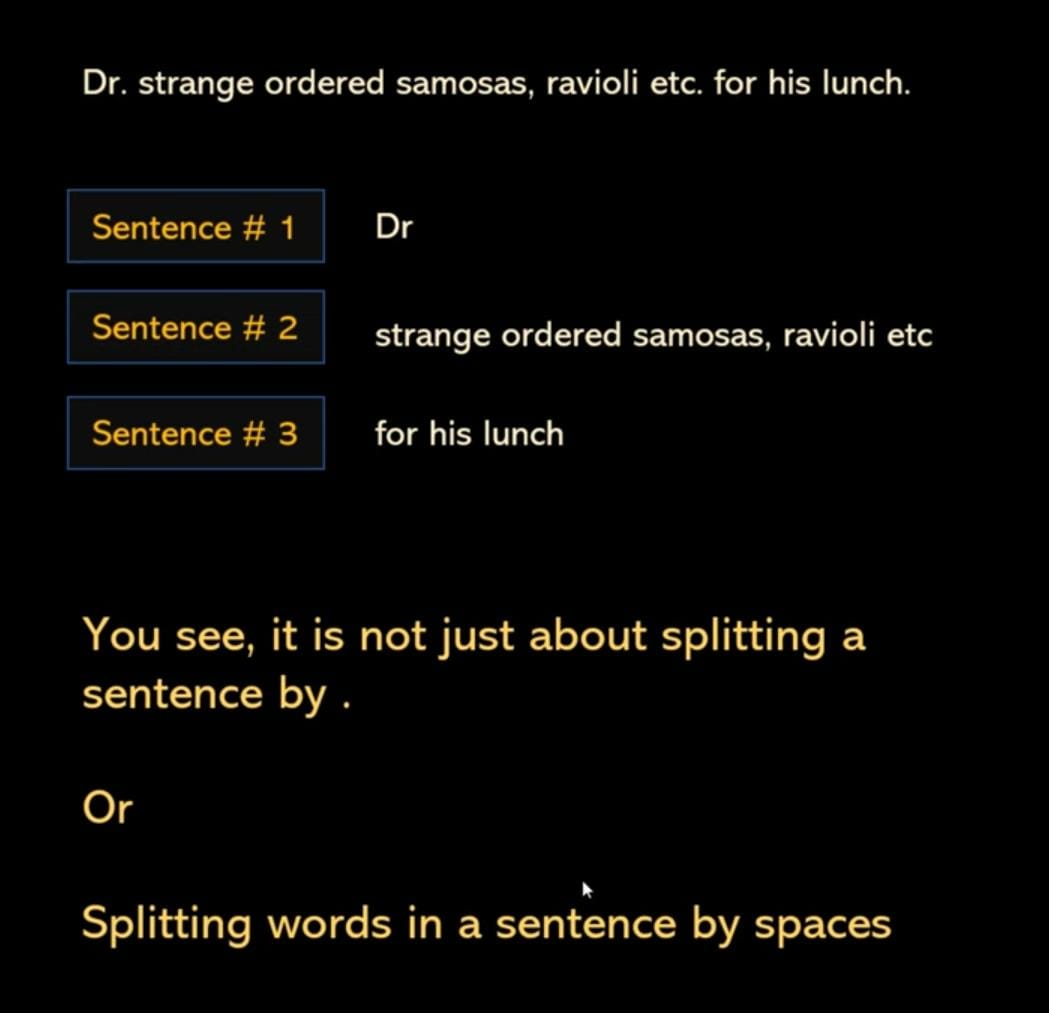

In [2]:
import spacy

In [3]:
# Creating a language object
nlp = spacy.blank("en") # en stands for English
# Refer to https://spacy.io/usage/models for references
# Here, we have created a nlp object which has a basic understanding of English language

# Now providing a random text
doc = nlp("Dr. Strange loves pav bhaji of Mumbai as it costs only 2$ per plate.")

for token in doc:
  print(token)

Dr.
Strange
loves
pav
bhaji
of
Mumbai
as
it
costs
only
2
$
per
plate
.


## Here, we can see it has already done Word Tokenization.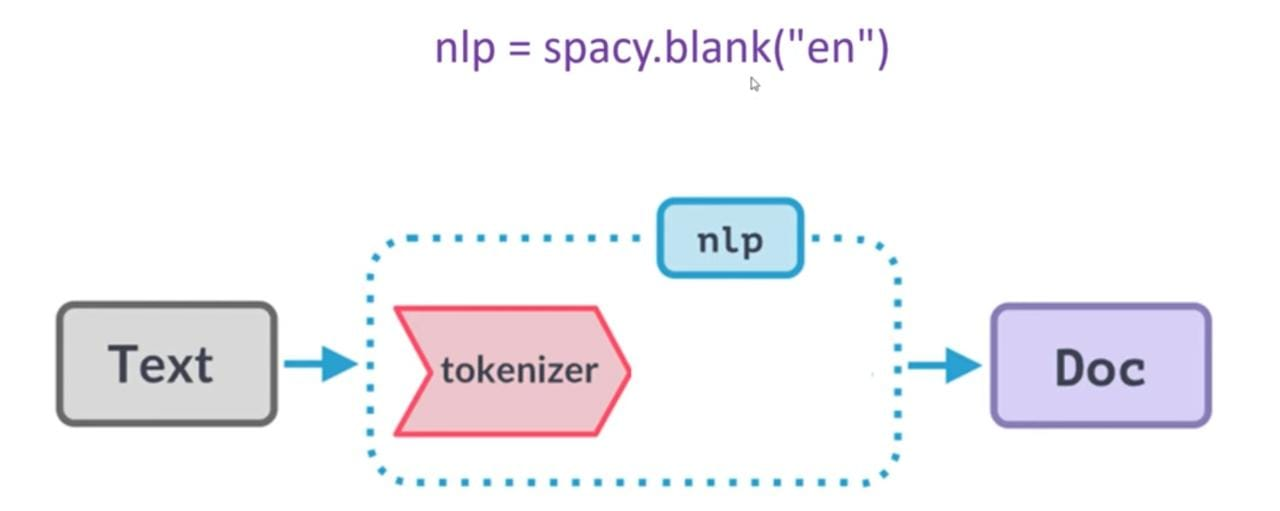

## Refer https://www.firstlanguage.in/ where you we can perform our operations. GPU is not required here instead it has already uploaded in cloud. Hence, we don't need a local machine with lot of resources. Here, we can get an API access after sign in to our dashboard.

In [4]:
doc[3]

pav

In [5]:
doc[8]

it

In [6]:
doc[-4]

$

In [7]:
doc = nlp(''' "Let's go to N.Y.!" ''')

for token in doc:
  print(token)

 
"
Let
's
go
to
N.Y.
!
"


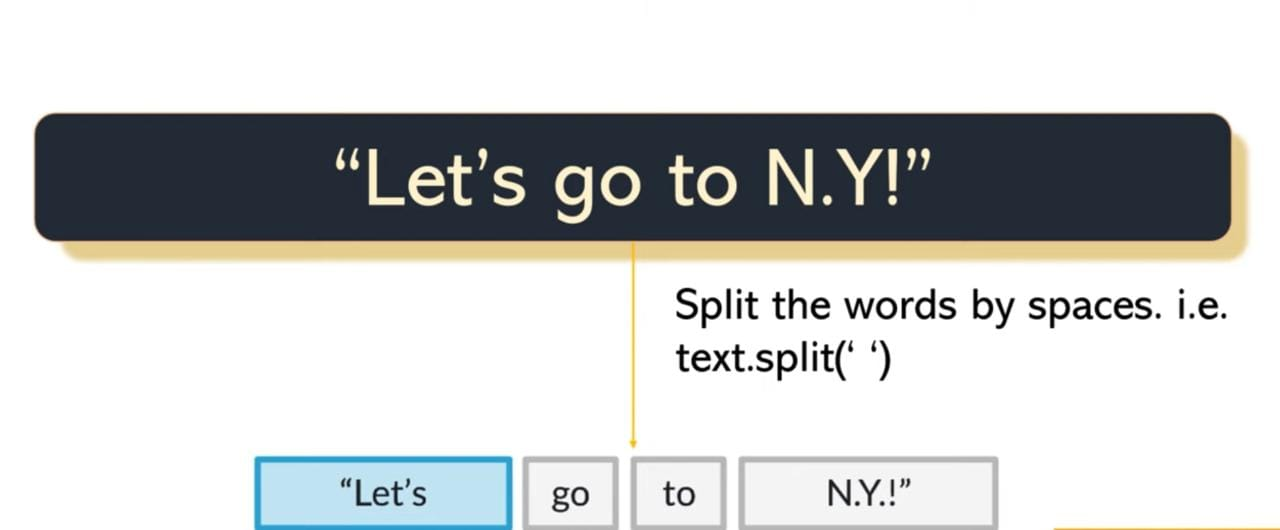

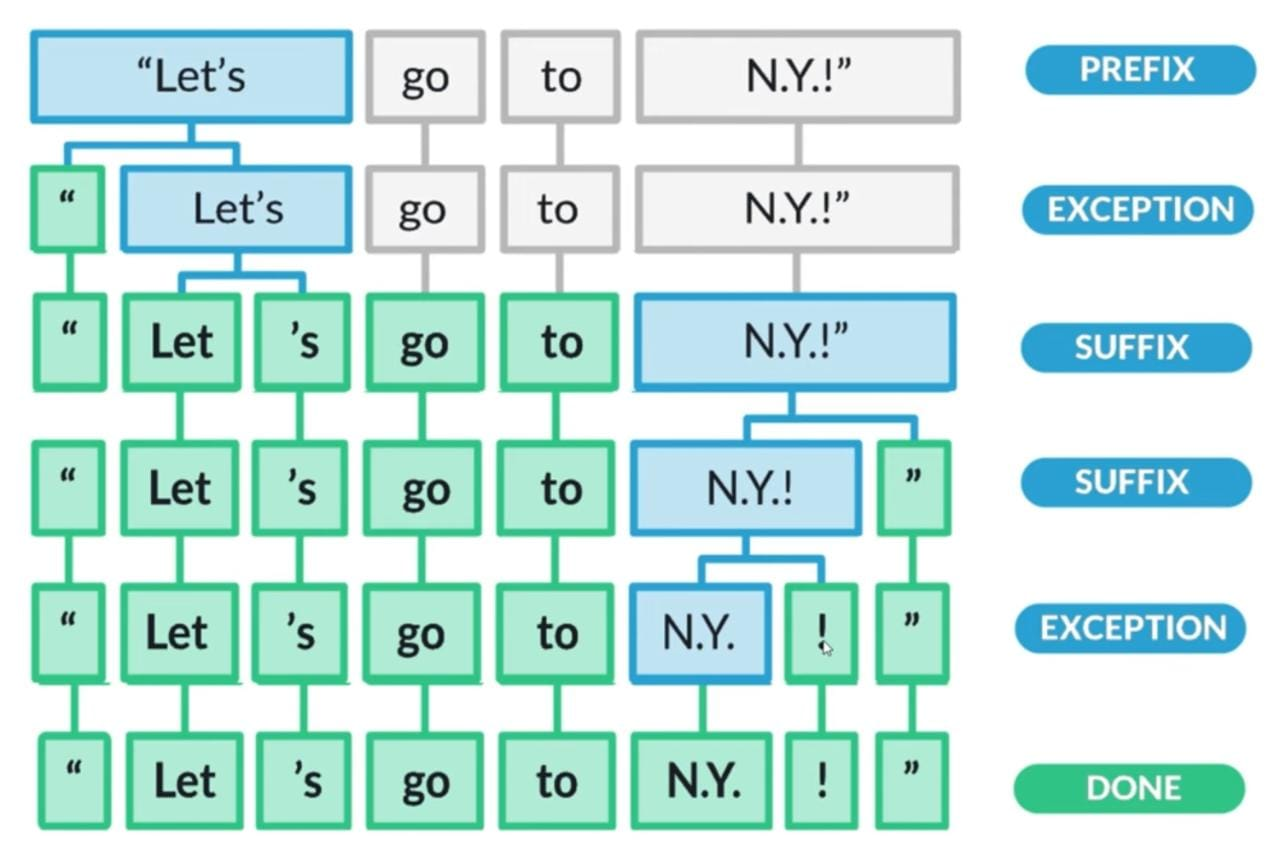

In [8]:
type(nlp)

spacy.lang.en.English

In [9]:
type(doc)

spacy.tokens.doc.Doc

In [10]:
type(token)

spacy.tokens.token.Token

In [11]:
doc[1:5]

"Let's go

In [13]:
# Another example
doc = nlp("Tony gave two $ to Peter.")

In [14]:
token0 = doc[0]
token0

Tony

In [15]:
dir(token) 

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'le

## Here, we can see all the methods in __'token'__ variable of python.

In [16]:
type(token)

spacy.tokens.token.Token

In [17]:
token0.is_alpha # Checking if there are alphabets in token0 or not

True

In [18]:
token0.like_num # Checking if there are numbers in token0 or not

False

In [19]:
token2 = doc[2]
token2

two

In [20]:
token2.text

'two'

In [21]:
token2.like_num

True

## Here, we can see __spaCy__ automatically detects that 'two' is number. That's why it returns 'True'

In [23]:
token3 = doc[3]
token3

$

In [24]:
token3.text

'$'

In [25]:
token3.like_num

False

In [26]:
token3.is_currency

True

## Here, again we can see that __spaCy__ knows that __'$'__ is a currency. That's why it returns 'True' when we call 'is_currency' method.

In [27]:
for token in doc:
  print(token, "==>", "index: ", token.i,
        "is_alpha:", token.is_alpha,
        "is_punct:", token.is_punct,
        "like_num:", token.like_num,
        "is_currency:", token.is_currency,
        )

Tony ==> index:  0 is_alpha: True is_punct: False like_num: False is_currency: False
gave ==> index:  1 is_alpha: True is_punct: False like_num: False is_currency: False
two ==> index:  2 is_alpha: True is_punct: False like_num: True is_currency: False
$ ==> index:  3 is_alpha: False is_punct: False like_num: False is_currency: True
to ==> index:  4 is_alpha: True is_punct: False like_num: False is_currency: False
Peter ==> index:  5 is_alpha: True is_punct: False like_num: False is_currency: False
. ==> index:  6 is_alpha: False is_punct: True like_num: False is_currency: False


## We can also extract emails from a large web document rather than using Regular Expressions. Refer https://spacy.io/usage/rule-based-matching.

In [29]:
# Let's operate with Hindi language
nlp = spacy.blank("hi") # hi stands for Hindi

doc = nlp("हमे पत हे कि लिओनेल मेस्सि सब्से ग्रेअतेस्त फ़ौत्बल्ल प्लयेर हे इस दुनिय मे, ये अभि तक अप्ने चरैर मे 8 बलोन दोर जैत छुके हे")
for token in doc:
  print(token, token.is_currency, token.like_num)

हमे False False
पत False False
हे False False
कि False False
लिओनेल False False
मेस्सि False False
सब्से False False
ग्रेअतेस्त False False
फ़ौत्बल्ल False False
प्लयेर False False
हे False False
इस False False
दुनिय False False
मे False False
, False False
ये False False
अभि False False
तक False False
अप्ने False False
चरैर False False
मे False False
8 False True
बलोन False False
दोर False False
जैत False False
छुके False False
हे False False


## We can see corresponding to '8' __spaCy__ knows that it's a number that's why it gives 'True'. Refer https://spacy.io/usage/models.

In [30]:
# Customizing the Tokenizer
doc = nlp("gimme double cheese extra large healthy pizza")
# Here gimme means 2 words give + me

tokens = [token.text for token in doc] # List comprehension is an easy way to perform For loop
tokens

['gimme', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

In [32]:
from spacy.symbols import ORTH

nlp.tokenizer.add_special_case("gimme", [
    {ORTH: "gim"},
    {ORTH: "me"}
])

doc = nlp("gimme double cheese extra large healthy pizza")

## In __tokenizer__, we can't change the actual text; we can only just split the existing texts.

In [33]:
tokens = [token.text for token in doc]
tokens

['gim', 'me', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

In [34]:
# Now let's perform sentence tokenizer
doc = nlp("Dr. Strange loves pav bhaji of Mumbai. hulk loves chat of Delhi")

for sentence in doc.sents:
  print(sentence)

ValueError: ignored

## Well it's saying my NLP pipeline is kind of blank.

In [35]:
nlp.pipe_names

[]

In [36]:
nlp.add_pipe('sentencizer')

In [37]:
nlp.pipe_names

['sentencizer']

## Now we can see my pipeline has a 'sentencizer' component. Now our NLP object knows how to split paragraph into sentences.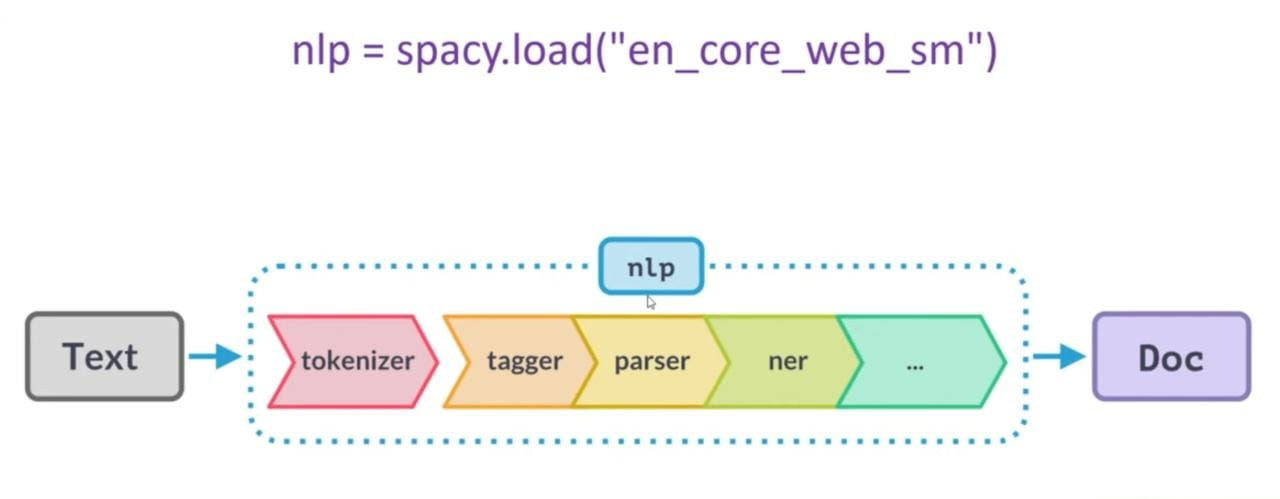

In [38]:
doc = nlp("Dr. Strange loves pav bhaji of Mumbai. hulk loves chat of Delhi")

for sentence in doc.sents:
  print(sentence)

Dr.
Strange loves pav bhaji of Mumbai.
hulk loves chat of Delhi
